# Figures for GoM trend paper

In [1]:
import xarray as xr
import json
import gcsfs
import numpy as np
import cmocean
import cartopy.crs as ccrs #cartopy coord ref sys
import cartopy
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.colors import LogNorm
from scipy import stats
import matplotlib as mpl
from matplotlib.colors import TwoSlopeNorm

In [11]:
sst_ds = xr.open_dataset('/work5/stb/ERA5/sst.nc', chunks={})
tcc_ds = xr.open_dataset('/work5/stb/ERA5/tcc.nc', chunks={})
mslp_ds = xr.open_dataset('/work5/stb/ERA5/mslp.nc', chunks={})
u10_ds = xr.open_dataset('/work5/stb/ERA5/u10.nc', chunks={})
v10_ds = xr.open_dataset('/work5/stb/ERA5/v10.nc', chunks={})
mask_ds = xr.open_dataset('/work5/stb/ERA5/mask.nc', chunks={})
lcc_ds = xr.open_dataset('/work/Shanice.Bailey/ERA5/lcc.nc', chunks={})
glorys = xr.open_dataset('glorys_vars.nc', chunks={})
heat_fluxes = xr.open_dataset('/work/Shanice.Bailey/ERA5/era-heat-fluxes.nc', chunks={})
#hf = xr.open_dataset('/work/Shanice.Bailey/ERA5/heat-fluxes_1959-2021.nc', chunks={})

In [3]:
sst_ds

<xarray.Dataset> Size: 8GB
Dimensions:                  (latitude: 55, longitude: 69, time: 552264)
Coordinates:
  * latitude                 (latitude) float32 220B 31.0 30.75 ... 17.75 17.5
  * longitude                (longitude) float32 276B 262.0 262.2 ... 279.0
  * time                     (time) datetime64[ns] 4MB 1959-01-01 ... 2021-12...
Data variables:
    sea_surface_temperature  (time, latitude, longitude) float32 8GB dask.array<chunksize=(552264, 55, 69), meta=np.ndarray>

In [12]:
time_slice = dict(time=slice('1993', '2021-06-30'))
gom = dict(longitude=slice(-98, -81), latitude=slice(17.5, 31))

glorys_gom = glorys.sel(**gom).isel(depth=0).drop_vars('depth').sel(**time_slice)
sst = sst_ds.sea_surface_temperature.sel(**time_slice)
tcc = tcc_ds.total_cloud_cover.sel(**time_slice)
mslp = mslp_ds.mean_sea_level_pressure.sel(**time_slice)
u10 = u10_ds['10m_u_component_of_wind'].sel(**time_slice)
v10 = v10_ds['10m_v_component_of_wind'].sel(**time_slice)
mask = mask_ds.land_sea_mask
lcc = lcc_ds.lcc.sel(**time_slice)

sw = heat_fluxes.ssr.sel(**time_slice) / (60*60) #W/m2
lw = heat_fluxes.str.sel(**time_slice) / (60*60) #W/m2
sh = heat_fluxes.sshf.sel(**time_slice) / (60*60) #W/m2
lh = heat_fluxes.slhf.sel(**time_slice) / (60*60) #W/m2

sst_g = glorys_gom.thetao
ssh = glorys_gom.zos
u = glorys_gom.uo
v = glorys_gom.vo
eke = 0.5 * (u**2 + v**2)

In [ ]:
sst[0].plot()

## Trends (spatial maps)

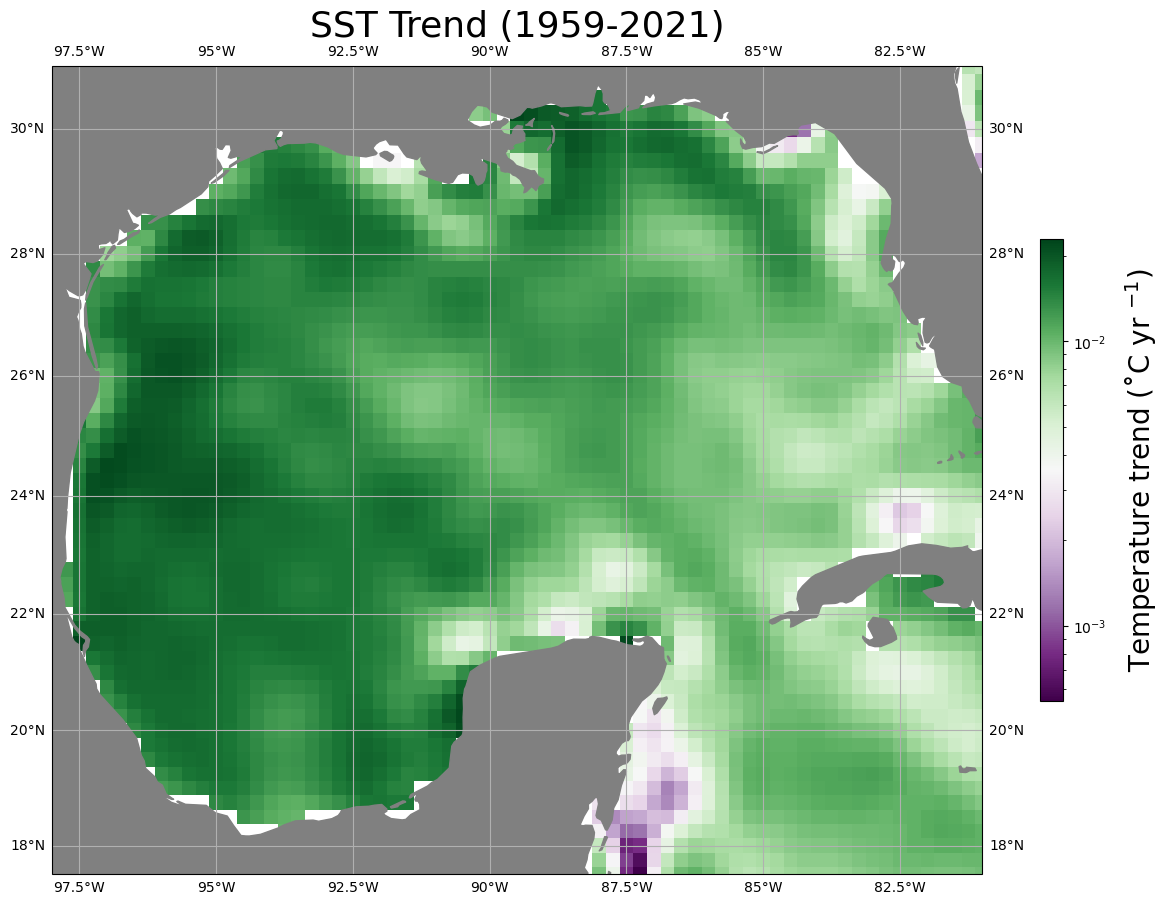

In [39]:
proj = ccrs.Mercator() #with Mercator you can put lat lon values.
fig, ax = plt.subplots(figsize=(15, 15), subplot_kw=dict(projection=proj))

ax.set_extent([-98, -81, 17.5, 31], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='0.5'))
da = trend_sst.polyfit_coefficients[0]
im = ax.pcolormesh(da.longitude, da.latitude, da, transform=ccrs.PlateCarree(), 
                   norm=LogNorm(), cmap='PRGn')#, vmin=-0.02, vmax=0.02)
cb = fig.colorbar(im, ax=ax, shrink=0.4)
cb.set_label(r"Temperature trend (˚C yr $^{-1}$)", labelpad=12, fontsize=20)

g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
g1.xlabels_top = False
g1.ylabels_right = False

plt.title('SST Trend (1959-2021)', fontsize=26);

## Trends (basin-average)

## EOF composites